### Zadanie nr 1 (10p.)
Otrzymaliśmy dane w następującej postaci: "{dzień tygodnia};{cztery znaki zawierające wskazanie czujnika}" (zawsze są to 4 znaki!). Napisz skrypt, który wygeneruje raport z konkretnego dnia na prośbę użytkownika:

1. Poproś o podanie dnia dla którego ma zostać wyliczony raport (wielkość liter nie powinna mieć znaczenia)
2. Pobierz odpowiednią wartość z danych
3. Przelicz wskazanie czujnika na temperaturę dzieląc przez wartość z tabeli
4. Wypisz temperaturę z dokładnością do trzeciego miejsca po przecinku (tak jak na przykładzie) i ze znakiem specjalnym ℃ (\u2103)
5. BONUS. Do punktu 1 dodaj walidację - upewnij się, że użytkownik podał jeden z dni który możemy znaleźć w danych
6. BONUS. Do punktu 4 dodaj wizualizację temperatury w zakresie 0 do 100 stopni na pasku złożonym z 20 znaków (np. dla 50 stopni, zapełnione jest 10/20 znaków)

##### Tabela przeliczania

```
Wskazanie czujnika - przelicznik:

Większe niż, lub równe 1400 - 22.5
Pomiędzy 1400, a 1200 - 23.1
Mniejsze niż, lub równe 1200 - 23.5
```

Przykładowe wyjście

```
Dane dla "thursday"
Wskazanie czujnika: 1100
Temperatura: 46.809℃
0℃ |#########-----------| 100℃  # BONUS
```


In [8]:
#Dane dla dni tygodnia
week_data = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

#1. Prośba o wpisanie dnia (bez znaczenia wielkość liter)
input_day = input('Prosze o podanie dnia dla którego ma zostać wyliczony raport: ')

#2. Pobranie wartości z danych
day, sensor = input_day.split(';')
day = day.lower()
sensor = int(sensor)

#5 Walidacja danych:
if any(day in d for d in week_data):

    #Wypisanie dnia i wskazania czujnika
    print('Dane dla "{}"'.format(day))
    print('Wskazanie czujnika: {}'.format(sensor))
 
    #3. Obliczenie temperatury na bazie wskazania czujnika
    if sensor >= 1400:
          temp = sensor / 22.5
    elif sensor <= 1200:
          temp = sensor / 23.5
    else:
          temp = sensor / 23.1

    #4. Wypisanie obliczonej temperatury
    print('Temperatura: {:.3f} \u2103'.format(temp))
    
    #6 Wizualizacja temperatury
    n = round(20 * temp / 100)
    bar = n * '#' + (20 - n) * '-'
    print('0\u2103 |{}| 100\u2103'.format(bar))

else:
    print('Nieporawny dzień tygodnia! >:c')

Prosze o podanie dnia dla którego ma zostać wyliczony raport: FriDay;2340
Dane dla "friday"
Wskazanie czujnika: 2340
Temperatura: 104.000 ℃
0℃ |#####################| 100℃


### Zadanie nr 2 (15p.)

### Napisz gre "kółko i krzyżyk"

Wyświetlaj aktualny stan planszy przy pomocy znaków 'o', 'x', '-' w trzech wierszach
Np.:

```
--x
-x-
oo-
```

Naprzemiennie pytaj gdzie postawić 'x', a gdzie 'o' przyjmując numer pozycji od 1 do 9
Tzn.:

```
123
456
789
```

Zakończ grę gdy jedna ze stron wygra, lub wszystkie miejsca będą zapełnione

Na razie wyświetlaj wszystko po kolei, jedno pod drugim

In [3]:
# print("Kółko i krzyżyk!")

#import bibliotek
import numpy as np

#Zdefiniowanie planszy i znaków - początkowy stan gry
plansza = "---\n---\n---"
x_o = ['x', 'o', 'x', 'o', 'x', 'o', 'x', 'o', 'x']
i = 0 
win = False

#Funkcja do wpisania znaku na planszy
def x_o_in(board, cords, x_o):
    
    split_board = list(board.replace('\n', ''))

    if split_board[int(cords)-1] == '-':
        split_board[int(cords)-1] = x_o
    else:
        print('Pole już zajętę!')
            
    join_board = ''.join(split_board[:3]) + '\n' + ''.join(split_board[3:6]) + '\n' + ''.join(split_board[6:])
    return join_board


#Funkcja do sprawdzenia wygranej
def is_win(board, win = False):
    
    split_board = np.array(board.split('\n'))
    
    h_win = [False, False, False]
    v_win = [False, False, False]
    d_win = [False, False]
    
    #Sprawdzenie poziomo
    for i in range(0,3,1):
        if '---' not in split_board:
            h_win[i] = all([split_board[i][0] == split_board[i][1], split_board[i][1] == split_board[i][2]])
        
    #Sprawdzenie pionowo
    for i in range(0,3,1):
        if '---' not in split_board.T:
            v_win[i] = all([split_board[0][i] == split_board[1][i], split_board[1][i] == split_board[2][i]])
            
    #Sprawdzenie na ukos
    if '---' not in split_board and '---' not in split_board.T:
        d_win[0] = all([split_board[0][0] == split_board[1][1], split_board[1][1] == split_board[2][2]])
        d_win[1] = all([split_board[0][2] == split_board[1][1], split_board[1][1] == split_board[2][0]])
        
    win = any([any(h_win), any(v_win), any(d_win)])
    
    if win == True:
        print('Wygrana! Koniec gry.')
        
    return win
            

# Główna pętla gry
while ('-' in plansza) & (win == False):
    
    # Pobierz decyzję 
    x = input('Gdzie postawić {}? Podaj numer pola: '.format(x_o[i]))
    
    #Wpisanie znaku
    plansza = x_o_in(plansza, x, x_o[i])
        
    # Wyświetl planszę
    print(plansza)
    
    #Sprawdzenie czy wygrana
    win = is_win(plansza)
    
    #Iteracja po kolejnych znakach z listy x_o
    i += 1
    

Gdzie postawić x? Podaj numer pola: 1
x--
---
---
Brak wygranej
Gdzie postawić o? Podaj numer pola: 2
xo-
---
---
Brak wygranej
Gdzie postawić x? Podaj numer pola: 5
xo-
-x-
---
Brak wygranej
Gdzie postawić o? Podaj numer pola: 6
xo-
-xo
---
Brak wygranej
Gdzie postawić x? Podaj numer pola: 9
xo-
-xo
--x
Wygrana! Koniec gry.


### Zadanie nr 3 (10p.)

Zadanie - Sklep internetowy (use case)

Wyobraź sobie, że jesteś właścicielem sklepu internetowego, oraz magazynu, który przechowuje Twoje produkty.

Zdefiniuj jakie produkty chcesz sprzedawać.

Zastanów się jak możesz skorzystać z poznanych metod programowania obiektowego w swoim biznesie.

Przemyśl jakie cechy charakteryzują Twoje obiekty i jakie metody mogą być dla Ciebie użyteczne.

Zaprojektuj definicje klas Twoich obiektów. 

Opisz zaprojektowane rozwiązanie i zaimplementuj potrzebne klasy.

In [ ]:
# Opis

# Sklep jaki stworzyłam zajmuje się sprzedarzą pluszaków. Stworzyłam trzy klasy, pierwsza Product zawierająca 
# informacje na temat sprzedawanej tulanki. Druga klasa Warehouse odpowiada za przechowywanie informacji 
# ile pluszaków jest w magazynie sklepu. Ostatnia klasa Store zawiera metody do dodania/usunięcia produktów z koszyka, 
# lub podsumowania zamówienia. 

In [24]:
from collections import Counter   
    
class Product:

    def __init__(self, name, animal_type, color, price):
        self.name = name
        self.animal_type = animal_type
        self.color = color
        self.price = price
        self.amount = 0
    
    def info(self):
        print('Info about {}:\n\tAnimal type - {}\n\tColor - {}\n\tPrice - {} zł'.format(self.name, 
                                                                                         self.animal_type,
                                                                                         self.color,
                                                                                         self.price))
        
class Warehouse:
    
    def __init__(self):
        self.warehouse = []
        
    def add_warehouse(self, product):
        product.amount = int(input('What amount of {} should be added? '.format(product.name)))
        self.warehouse.append(product)
        print('\nAdded {} to warehouse!'.format(product.name))
        
    def display_warehouse(self):
        print('\nWarehouse:')
        for product in self.warehouse:
            print('\t{} - {} zł [amount: {}]'.format(product.name, product.price, product.amount))
    
        
class Store(Warehouse):
    
    def __init__(self, storage):
        Warehouse.__init__(self)
        self.cart = []
        self.storage = storage
     
    def add_to_cart(self, product):
        for item in self.storage.warehouse:
            if item.name == product.name and item.amount != 0:
                self.cart.append(item)
                item.amount -= 1
                print('\nAdded {} to cart!'.format(item.name))
                return
        print('Item not in store :(')
            
    def remove_from_cart(self, product):
        for item in self.cart:
            if item.name == product.name and item.amount != 0:
                self.cart.remove(item)
                item.amount += 1
                print('\n{} removed from cart'.format(item.name))
                return
        print('Item not in store :(')
    
    def display_cart(self):
        cart_items = Counter(self.cart)
        print('\nCart:')
        for item in cart_items:
            print('\t{} [amount: {}]'.format(item.name, cart_items[item]))
        
    def summarize_cart(self):
        total = 0
        for product in self.cart:
            total += product.price
        print('\nTotal price comes to {} zł'.format(total))
        
    

In [25]:
#Stworzenie obiektów do sklepu
pluszak1 = Product('Pan króliczek', 'królik', 'czarno-biały', 25)
pluszak2 = Product('Miś Tuliś', 'miś', 'beżowy', 50)

#Wyświetlenie informacji o produkcie
pluszak1.info()

#Stworzenie magazynu
magazyn = Warehouse()

#Dodanie produktów do magazynu
magazyn.add_warehouse(pluszak1)
magazyn.add_warehouse(pluszak2)

#Wyświetlenie zawartości magazynu
magazyn.display_warehouse()

#Stworzenie sklepu
sklepik = Store(magazyn)

#Dodanie produków do koszyka
sklepik.add_to_cart(pluszak1)
sklepik.add_to_cart(pluszak2)

#Wyświetlenie koszyka
sklepik.display_cart()

#Usunięcie produktu z koszyka
sklepik.remove_from_cart(pluszak1)

#Wyświetlenie koszyka
sklepik.display_cart()

#Podsumowanie kosztów
sklepik.summarize_cart()


Info about Pan króliczek:
	Animal type - królik
	Color - czarno-biały
	Price - 25 zł
What amount of Pan króliczek should be added? 150

Added Pan króliczek to warehouse!
What amount of Miś Tuliś should be added? 200

Added Miś Tuliś to warehouse!

Warehouse:
	Pan króliczek - 25 zł [amount: 150]
	Miś Tuliś - 50 zł [amount: 200]

Added Pan króliczek to cart!

Added Miś Tuliś to cart!

Cart:
	Pan króliczek [amount: 1]
	Miś Tuliś [amount: 1]

Pan króliczek removed from cart

Cart:
	Miś Tuliś [amount: 1]

Total price comes to 50 zł


### Zadanie nr 4 (10p.)

Napisz funkcję create_tower, która jako input przyjmuje integera większego od 0
i zwraca listę, która tworzy "piramidę" z tyloma piętrami:


In [ ]:
#Przykładowe rozwiązanie:
#In: create_tower(3)
#Out:
[
'  *  ', 
' *** ', 
'*****'
]

In [5]:
def create_tower(floors):
    if floors < 0:
        print('Niepoprawna liczba pięter! >:c')
    else:
        width = (2 * floors) - 1
        tower = []
        for i in range(1, 2 * floors, 2):
            tower.append((i * '*').center(width))
        return tower
            
#Test funkcji            
create_tower(5)

['    *    ', '   ***   ', '  *****  ', ' ******* ', '*********']

### Zadanie nr 5 (10p.)

Napisz program, który poprosi użytkownika o podanie listy imion. Następnie program powinien wykorzystać pętlę for do iteracji po każdym imieniu z listy i wyświetlić je na ekranie. Na końcu program powinien obliczyć i wyświetlić liczbę wprowadzonych imion.

Podpowiedź: Możesz użyć funkcji len() do obliczenia liczby elementów w liście.

Przykład interakcji programu:
```
Podaj listę imion (oddzielone spacją): Jan Kasia Adam
Imiona wprowadzone przez użytkownika:
- Jan
- Kasia
- Adam
Liczba imion: 3
```

In [12]:
def name_num():
    names = input('Podaj listę imion (oddzielone spacją):').split()
    print('Imiona wprowadzone przez użytkownika:')
    for i in range(len(names)):
        print('- {}'.format(names[i]))
    print('Liczba imion: {}'.format(i+1))
        
name_num() 

Podaj listę imion (oddzielone spacją):Jan Kasia Adam
Imiona wprowadzone przez użytkownika:
- Jan
- Kasia
- Adam
Liczba imion: 3


### Zadanie nr 6 (20p.)

W tym zadaniu musisz zaimplementować pewne zasady z gry Pac-Man, klasycznej gry z lat 80. w salonach arkadowych.

Masz cztery zasady do zaimplementowania, wszystkie związane z stanami gry.

1. Zdefiniuj, czy Pac-Man zjada duszka.

Zdefiniuj funkcję eat_ghost(), która przyjmuje dwa parametry (czy Pac-Man ma aktywny pellet mocy (touching_power_pellet) i czy Pac-Man dotyka duszka (touching_ghost)) i zwraca wartość logiczną (True/False), czy Pac-Man może zjeść duszka. Funkcja powinna zwrócić True tylko wtedy, gdy Pac-Man ma aktywny pellet mocy i dotyka duszka.

In [ ]:
def eat_ghost(power_pellet_active, touching_ghost):
    
    return all([power_pellet_active, touching_ghost])

2. Zdefiniuj, czy Pac-Man zdobywa punkty.

Zdefiniuj funkcję score(), która przyjmuje dwa parametry (czy Pac-Man dotyka pelletu mocy i czy Pac-Man dotyka kropki) i zwraca wartość logiczną, czy Pac-Man zdobył punkt. Funkcja powinna zwrócić True, jeśli Pac-Man dotyka pelletu mocy lub kropki.

In [ ]:
def score(touching_power_pellet, touching_dot):
    
    return any([touching_power_pellet, touching_dot])

3. Zdefiniuj, czy Pac-Man przegrywa.

Zdefiniuj funkcję lose(), która przyjmuje dwa parametry (czy Pac-Man ma aktywny pellet mocy i czy Pac-Man dotyka duszka) i zwraca wartość logiczną, czy Pac-Man przegrywa. Funkcja powinna zwrócić True, jeśli Pac-Man dotyka duszka i nie ma aktywnego pelleta mocy.

In [ ]:
def lose(power_pellet_active, touching_ghost):
    
    if touching_ghost and power_pellet_active == False:
        return True
    else:
        return False

4. Zdefiniuj, czy Pac-Man wygrywa.

Zdefiniuj funkcję win(), która przyjmuje trzy parametry (czy Pac-Man zjadł wszystkie kropki, czy Pac-Man ma aktywny pellet mocy i czy Pac-Man dotyka duszka) i zwraca wartość logiczną, czy Pac-Man wygrywa. Funkcja powinna zwrócić True, jeśli Pac-Man zjadł wszystkie kropki i nie przegrał na podstawie zdefiniowanych parametrów w części 3.

In [ ]:
def win(has_eaten_all_dots, power_pellet_active, touching_ghost):
    
    if has_eaten_all_dots and lose(power_pellet_active, touching_ghost) == False:
        return True
    else:
        return False

### Zadanie nr 7 (12p.)

Pobierz zbiór danych o zawodnikach NBA: https://www.kaggle.com/justinas/nba-players-data
otwórz go za pomocą Pandas i odpowiedz na pytania:
1. Czy jest jakikolwiek zawodnik spoza USA, który przed NBA uczęszczał do college'u Kentucky?
2. Ile wynosi średni wzrost zawodnika w calach??
   Czy od pierwszego sezonu w tym zbiorze do teraz powiększył się czy zmniejszył?
3. Kto w badanym okresie rzucił łącznie najwięcej punktów?
   Czy ta osoba miała też największą średnią punktów na sezon?
4. W której rundzie draftu największy udział procentowy mieli zawodnicy ważący więcej niż 100 kg?


In [7]:
#Dodanie bilbiotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Wczytanie danych z csv
all_seasons = pd.read_csv('all_seasons.csv',  index_col=0)

In [8]:
#Pytanie 1

#Wyodrębnienie zawodników spełniającyh kryteria
players = all_seasons[(all_seasons['country'] != 'USA') & 
                      (all_seasons['college'] == 'Kentucky')]['player_name'].unique()

#Wypisanie zawodników
print('Tak, są to następujący zawodnicy:')
for i in range(len(players)):
    print('- {}'.format(players[i]))
    
#ODPOWIEDZ: TAK

Tak, są to następujący zawodnicy:
- Jamaal Magloire
- Kelenna Azubuike
- Enes Kanter
- Skal Labissiere
- Jamal Murray
- Shai Gilgeous-Alexander
- Isaac Humphries
- Mychal Mulder
- Trey Lyles
- Wenyen Gabriel
- Nick Richards
- Olivier Sarr


Średni wzrost zawodnika w calach to: 78.98"


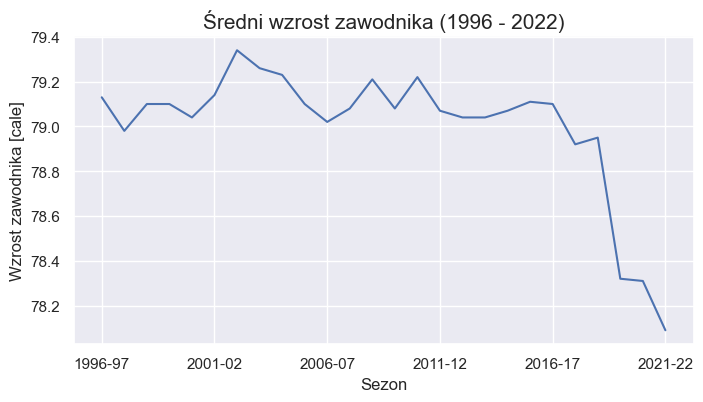

In [9]:
#Pytanie 2

#Średni wzrost ogółem i na sezon (konwersja na cale)
avg_height = round(all_seasons['player_height'].mean() / 2.54, 2)
avg_height_season = round(all_seasons.groupby(['season'])['player_height'].mean() / 2.54, 2)

print('Średni wzrost zawodnika w calach to: {}"'.format(avg_height))

#Wykres średniego wzrostu zawodników
sns.set(style='darkgrid')
avg_height_season.plot(y = 'height', x = 'season', figsize = (8, 4))
plt.title('Średni wzrost zawodnika (1996 - 2022)', fontsize = 15)
plt.xlabel('Sezon')
plt.ylabel('Wzrost zawodnika [cale]')
plt.show()

#ODPOWIEDZ: Średni wzrost zmalał znacząco w ostatnich 5 sezonach

In [68]:
#Pytanie 3

#Wyodrębnienie zawodnika z najwyższą sumą średniej punktów na wszystkie sezony
pts_all = all_seasons.groupby(['player_name'])['pts'].sum().sort_values(ascending = False).reset_index()
print('Zawodnik z najwyższą liczbą punktów to {} z {} punktami.'.format(pts_all.player_name[0], 
                                                                        pts_all.pts[0]))

#Wyodrębnienie zawodnika z najwyższą średnią punktów na sezon
pts_season = all_seasons.groupby(['player_name'])['pts'].mean().sort_values(ascending = False).reset_index()
print('Zawodnik z najwyższą średnią punktów na sezon to {} z {} punktami.'.format(pts_season.player_name[0],
                                                                                  round(pts_season.pts[0], 1)))

#ODPOWIEDZ: Najwięcej rzucił LeBron James, miał on też najwyższą średnią na sezon.

Zawodnik z najwyższą liczbą punktów to LeBron James z 515.1 punktami.
Zawodnik z najwyższą średnią punktów na sezon to LeBron James z 27.1 punktami.


In [11]:
#Pytanie 4

#W której rundzie draftu największy udział procentowy mieli zawodnicy ważący więcej niż 100 kg?

#wytypowanie zawodników z wagą powyżej 100 kg
players_100 = all_seasons[all_seasons['player_weight'] > 100]

#Zliczenie liczby unikatowych zawodników na rundę draftu
draft_all = all_seasons.groupby(['draft_round'])['player_name'].nunique().to_frame()
draft_all = draft_all.reset_index().set_index('draft_round')
draft_all = draft_all.rename(columns= {'player_name': 'player_count'})

#Zliczenie liczby unikatowych zawodników na rundę draftu ważących powyżej 100 kg
draft_100 = players_100.groupby(['draft_round'])['player_name'].nunique().to_frame()
draft_100 = draft_100.reset_index().set_index('draft_round')
draft_100 = draft_100.rename(columns= {'player_name': 'player_over_100_count'})

#Stworzenie nowej tabeli porównującej zlicoznych zawodników
new_df = pd.concat([draft_all, draft_100], axis = 1, sort = False)
new_df.fillna(0, inplace=True)
new_df['percentage [%]'] = round(new_df.player_over_100_count / new_df.player_count * 100)
new_df

#ODPOWIEDZ: W rundzie 1 (wynik dla rundy 7 odrzucamy ponieważ jest to tylko jeden zawodnik)

,player_count,player_over_100_count,percentage [%]
draft_round,,,
0,4,0.0,0.0
1,997,549.0,55.0
2,693,338.0,49.0
3,9,3.0,33.0
4,5,2.0,40.0
6,4,1.0,25.0
7,1,1.0,100.0
8,1,0.0,0.0
Undrafted,761,275.0,36.0


### Zadanie nr 8 (13p.)
Pobierz zbiór danych dotyczący oczekiwanej długości życia wg WHO: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
otwórz go za pomocą Pandas i zaproponuj 3 różne strategie na poradzenie sobie z brakującymi wartościami.
Odpowiedz na pytania:

1. Jakie kolumny mają braki danych?
2. Jaka kolumna posiada największy udział procentowy braków danych i ile on wynosi?
1. Jakie 3 różne strategie zarządzania brakującymi danymi dobrałeś oraz dlaczego? 
2. Porównaj rozkład zmiennych przed oraz po uzupełnieniu brakujących danych (histogramy dla każdej strategii) dla kolumny, która miała najwiekszą liczbę braków.

In [6]:
import numpy as np
life_df = pd.read_csv('Life Expectancy Data.csv')

In [7]:
#Pytanie 1
nan_columns = list(life_df.columns[life_df.isna().any()])

print(nan_columns)

#OPDOWIEDŹ: Są to kolumny wypisane poniżej

['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
#Pytanie 2
#Suma wszystkich brakujących wartości
all_nan = life_df.isna().sum().sum()

#Procent brakujących wartości w poszczególnych kolumnach
nan_percentage = (life_df[nan_columns].isna().sum() / all_nan * 100).sort_values(ascending=False)
nan_percentage

#ODPOWIEDŹ: Jest to kolumna 'Population' i zawiera ona około 25.4% wszystkich brakujących wartości.

Population                         25.438939
Hepatitis B                        21.576278
GDP                                17.479516
Total expenditure                   8.817792
Alcohol                             7.569255
Income composition of resources     6.515802
Schooling                           6.359735
 BMI                                1.326570
 thinness  1-19 years               1.326570
 thinness 5-9 years                 1.326570
Polio                               0.741319
Diphtheria                          0.741319
Life expectancy                     0.390168
Adult Mortality                     0.390168
dtype: float64

In [9]:
#Pytanie 2****

#Po przejrzeniu wartości w kolumnie 'Population', doszłam do wniosku że pominę tą kolumnę. 
#Dane kraje nie posiadają w ogóle informacji o populacji. Poniżej przedstawiłam tego dowód. 

na_pop_df = life_df.loc[life_df['Population'].isna()]
na_pop_countires = na_pop_df['Country'].unique()

print('Lista krajów z brakującymi danymi o populacji: \n', na_pop_countires)

#Sprawdzenie czy jest kraj gdzie brakuje tylko części danych o populacji
na_countries_df = life_df.loc[life_df['Country'].isin(na_pop_countires)]
partly_na_countries = na_countries_df.loc[na_countries_df['Population'].notna()]['Country'].unique()

print('\nLista krajów z częściowo brakującymi danymi o populacji: \n', partly_na_countries)

print('\nPrzykładowe kraje:')
display(life_df[['Country', 'Year', 'Population']].loc[life_df['Country'] == 'Czechia'])
display(life_df[['Country', 'Year', 'Population']].loc[life_df['Country'] == 'Eritrea'])

#ODPOWIEDŹ: Tylko Erytrea ma cześciowo brakujące dane, reszta NaN w populacji obowiązuje dla wszytskich roczników w danym kraju.

Lista krajów z brakującymi danymi o populacji: 
 ['Antigua and Barbuda' 'Bahamas' 'Bahrain' 'Barbados'
 'Bolivia (Plurinational State of)' 'Brunei Darussalam' "Côte d'Ivoire"
 'Congo' 'Cook Islands' 'Cuba' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Dominica' 'Egypt' 'Eritrea' 'Gambia'
 'Grenada' 'Iran (Islamic Republic of)' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Libya' 'Marshall Islands'
 'Micronesia (Federated States of)' 'Monaco' 'Nauru' 'New Zealand' 'Niue'
 'Oman' 'Qatar' 'Republic of Korea' 'Republic of Moldova'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'San Marino' 'Saudi Arabia' 'Singapore' 'Slovakia' 'Somalia'
 'The former Yugoslav republic of Macedonia' 'United Arab Emirates'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam' 'Yemen']

Lista krajów z częściowo brakującym

,Country,Year,Population
689,Czechia,2015,NaN
690,Czechia,2014,NaN
691,Czechia,2013,NaN
692,Czechia,2012,NaN
693,Czechia,2011,NaN
694,Czechia,2010,NaN
695,Czechia,2009,NaN
696,Czechia,2008,NaN
697,Czechia,2007,NaN
698,Czechia,2006,NaN


,Country,Year,Population
850,Eritrea,2015,NaN
851,Eritrea,2014,NaN
852,Eritrea,2013,NaN
853,Eritrea,2012,NaN
854,Eritrea,2011,447469.0
855,Eritrea,2010,43984.0
856,Eritrea,2009,431334.0
857,Eritrea,2008,4232636.0
858,Eritrea,2007,4153332.0
859,Eritrea,2006,466648.0


In [10]:
#Pytanie 2****

#Jeszcze raz przeliczyłam udział procentowy NaN dla danych kolumn - tym razem z pominięciem 'Population'

#Usunięcie kolumny 'Population'
nan_columns = list(life_df.columns[life_df.isna().any()])
nan_columns.remove('Population')

#Suma wszystkich brakujących wartości
all_nan = life_df[nan_columns].isna().sum().sum()

#Procent brakujących wartości w poszczególnych kolumnach
nan_percentage = (life_df[nan_columns].isna().sum() / all_nan * 100).sort_values(ascending=False)
nan_percentage

#ODPOWIEDŹ: Jest to kolumna 'Hepatitis B' i zawiera ona około 28.9% wszystkich brakujących wartości.

Hepatitis B                        28.937729
GDP                                23.443223
Total expenditure                  11.826269
Alcohol                            10.151753
Income composition of resources     8.738880
Schooling                           8.529566
 BMI                                1.779173
 thinness  1-19 years               1.779173
 thinness 5-9 years                 1.779173
Polio                               0.994244
Diphtheria                          0.994244
Life expectancy                     0.523286
Adult Mortality                     0.523286
dtype: float64

In [11]:
#Pytanie 3

#Ze względu na dużą liczbę brakujących danych, zdecydowałam że lepszym podejściem będzie ich uzupełnienie, niżeli usunięcie.
#Brakujące dane pojawiają się do pewnego rocznika dla kraju, nie ma natomiast konketnej zależności do kiedy brakuje danych.
#Na przykład kraj gdzie wartości dla tej kolumny jest stosunkowo niższa ma więcej danych niż kraj gdzie jest ona wyższa.

#Przykład:
display(life_df[['Country', 'Year', 'Hepatitis B']].loc[life_df['Country'] == 'Madagascar'])
display(life_df[['Country', 'Year', 'Hepatitis B']].loc[life_df['Country'] == 'Ireland'])

,Country,Year,Hepatitis B
1554,Madagascar,2015,69.0
1555,Madagascar,2014,73.0
1556,Madagascar,2013,74.0
1557,Madagascar,2012,7.0
1558,Madagascar,2011,73.0
1559,Madagascar,2010,7.0
1560,Madagascar,2009,77.0
1561,Madagascar,2008,77.0
1562,Madagascar,2007,84.0
1563,Madagascar,2006,82.0


,Country,Year,Hepatitis B
1250,Ireland,2015,95.0
1251,Ireland,2014,95.0
1252,Ireland,2013,95.0
1253,Ireland,2012,95.0
1254,Ireland,2011,95.0
1255,Ireland,2010,46.0
1256,Ireland,2009,NaN
1257,Ireland,2008,NaN
1258,Ireland,2007,NaN
1259,Ireland,2006,NaN


In [13]:
#Pytanie 3

#Kolumny które nas interesują
hepa_cols = ['Country', 'Year', 'Hepatitis B']

#Podejście 1 
# Uzupełnienie średnią - najprostzy rodzaj imputacji, spełnia się w szybkim uzupełnieniu danych w przypadku analizy
# tylko jednej cechy. Średnia obliczana jest dla każdego kraju osobno. 

filled_1 = life_df[hepa_cols].copy()
filled_1['Hepatitis B'] = filled_1[['Country', 'Hepatitis B']].groupby("Country").transform(lambda x: x.fillna(x.mean()))

#Podejście 2
# Interpolacja danych - podejście o większej dokładności niż uzupełnienie średnią. Brany pod uwagę jest trend wartości
# uzupełnianych. Spełnia się w przypadku liniowej zmiany danych. Wartość kolumny 'Hepatitis B' powinna wykazywać tendecję
# wzrostową z każdym kolejnym rokiem. 

filled_2 = life_df[hepa_cols].interpolate()

#Podejście 3
# Ostatnie podejście wykorzystuje model regresji liniowej. Pobiera on dane z dwóch innych kolumn, wykazujących najwyższy stopień
# korelacji z 'Hepatitis B', czyli 'Diphteria' (0.61) i 'Polio' (0.48) i na podstawie podobieństwa w trendach uzupełnia
# brakujące wartości. Dzięki temu możliwe jest uzykanie bardziej wiarygodnych danych.

# Wyliczenie korelacji
corr = life_df.corr(numeric_only = True)
display(corr[['Hepatitis B']])

#import bibliotek
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

#Przypisanie kolumn
missing =  ['Hepatitis B']
predictor = ['Diphtheria ', 'Polio']

#Dopasowanie modelu regresji
imputer = IterativeImputer(estimator = BayesianRidge())

#Uzupełnienie brakujących wartości wygenerowanymi
imputed_data = imputer.fit_transform(life_df[predictor + missing])[:, -1:]
imputed_data = pd.DataFrame(imputed_data)

#Zamienienie NaN na wygenerowane wartości
filled_3 = life_df[hepa_cols].copy()
filled_3['Hepatitis B'] = imputed_data[0]


,Hepatitis B
Year,0.104333
Life expectancy,0.256762
Adult Mortality,-0.162476
infant deaths,-0.223566
Alcohol,0.087549
percentage expenditure,0.016274
Hepatitis B,1.000000
Measles,-0.120529
BMI,0.150380
under-five deaths,-0.233126


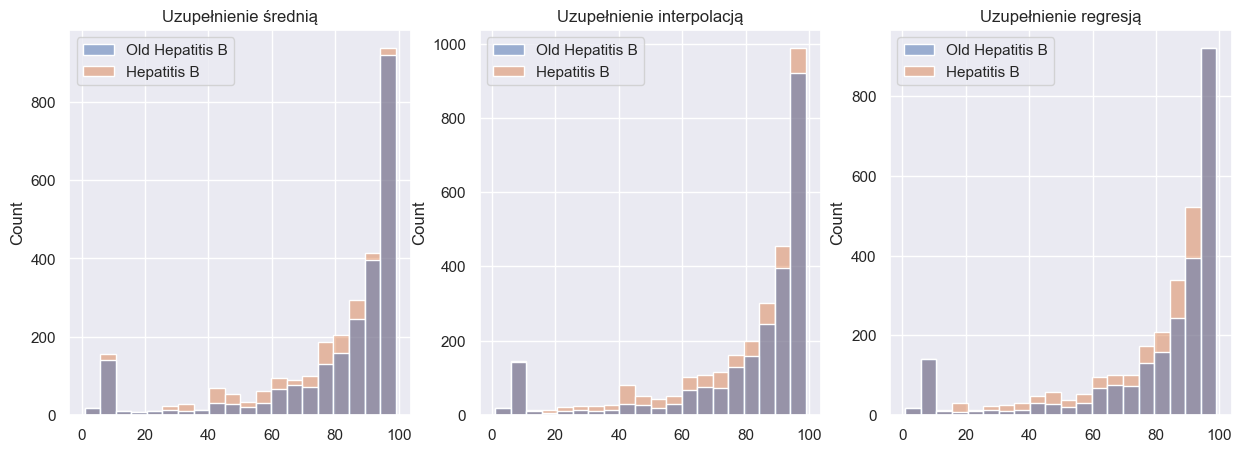

In [33]:
#Pytanie 4

# Objaśnienie kolumny
# Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.set_style('darkgrid')

filled_1['Old Hepatitis B'] = life_df['Hepatitis B']
filled_2['Old Hepatitis B'] = life_df['Hepatitis B']
filled_3['Old Hepatitis B'] = life_df['Hepatitis B']

#Rozkład dla podejścia 1
sns.histplot(filled_1[['Old Hepatitis B', 'Hepatitis B']], bins = 20, ax = axes[0], legend = True)
axes[0].set_title('Uzupełnienie średnią')

#Rozkład dla podejścia 2
sns.histplot(filled_2[['Old Hepatitis B', 'Hepatitis B']], bins = 20, ax = axes[1], legend = True)
axes[1].set_title('Uzupełnienie interpolacją')

#Rozkład dla podejścia 3
sns.histplot(filled_3[['Old Hepatitis B', 'Hepatitis B']], bins = 20, ax = axes[2], legend = True)
axes[2].set_title('Uzupełnienie regresją')

plt.show()